In [ ]:
#standard libraries
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# libraries for model building
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import(train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score,cross_validate)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (roc_auc_score,f1_score,precision_score, classification_report, 
                             confusion_matrix, roc_curve, recall_score,precision_recall_curve,make_scorer,auc,average_precision_score,ConfusionMatrixDisplay)

import optuna
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# VIF for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.style.use('seaborn-v0_8')
%matplotlib inline

In [5]:
# models imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
pd.set_option('display.max_columns',None)
credit=pd.read_csv(r'C:\first_data_science_proj\Credit_Card_Fraud_Detection\data\raw\creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
print(credit.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [9]:
#pipeline diagram
from sklearn import set_config
set_config(display='diagram')


In [10]:
#input and output variables
x=credit.drop('Class',axis=1)
y=credit['Class']




In [11]:
# train test split
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

#check
print(f'train shape: {x_train.shape}, test shape: {x_test.shape}')
print(f' credit ratio  :--> y train: {y_train.mean():.3f}, y test: {y_test.mean():.3f}')

train shape: (227845, 30), test shape: (56962, 30)
 credit ratio  :--> y train: 0.002, y test: 0.002


In [12]:
# identify pca features and time and amount features
pca_cols= [col for col in x.columns if col.startswith('V')]
raw_cols=[col for col in ['Amount','Time'] if col in x.columns]

print(pca_cols)
print(raw_cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
['Amount', 'Time']


In [13]:
pca_processsor=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('pca',PCA(n_components=0.95,random_state=42))
    ]
)
raw_processor=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaling',RobustScaler())
    ]
)

In [14]:
preprocessing_pipe=ColumnTransformer(
    transformers=[
        ('pca_process',pca_processsor,pca_cols),
        ('raw_process',raw_processor,raw_cols)
    ],remainder='drop'
)

In [15]:
preprocessing_pipe

ColumnTransformer(transformers=[('pca_process',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('pca',
                                                  PCA(n_components=0.95,
                                                      random_state=42))]),
                                 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                  'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                  'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                  'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                  'V27', 'V28']),
                                ('raw_process',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling', RobustScaler())]),
                                 ['Amount', 'Time'])])

In [16]:
# best model 
models={

    
    'xgboost': XGBClassifier(scale_pos_weight=10,n_estimators=300,max_depth=5,learning_rate=0.1,subsample=0.9,colsample_bytree=0.9,eval_metric='logloss',random_state=42,n_jobs=-1)
    }
   
scorings={
    'roc_auc': 'roc_auc',
    'pr_auc' : make_scorer(average_precision_score,needs_proba=True)
}
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
results=[]
for name,model in models.items():
    cr_pipe=ImbPipeline(steps=[
        ('preprocessing',preprocessing_pipe),
        ('smote',SMOTE(random_state=42)),
        ('classifier',model)
    ])
    scores=cross_validate(cr_pipe,x_train, y_train, cv=cv,scoring=scorings, n_jobs=-1)
    results.append({
        'model': name,
        'roc_auc_mean': np.mean(scores['test_roc_auc']),
        'roc-auc_std': np.std(scores['test_roc_auc']),
        'pr_auc_mean': np.mean(scores['test_pr_auc']),
        'pr_auc_std': np.std(scores['test_pr_auc'])
    })
    
    print(f"{name:12s} | roc auc : {np.mean(scores['test_roc_auc']):.4f}  {np.std(scores['test_roc_auc']):.4f} | pr auc : {np.mean(scores['test_pr_auc']):.4f}  {np.std(scores['test_pr_auc']):.4f}")


results_cr = pd.DataFrame(results).sort_values(by=['pr_auc_mean', 'roc_auc_mean'],ascending=False)
results_cr


xgboost      | roc auc : 0.9750  0.0084 | pr auc : 0.8269  0.0266


,model,roc_auc_mean,roc-auc_std,pr_auc_mean,pr_auc_std
0,xgboost,0.974993,0.008379,0.826894,0.026597


In [17]:
#tuning for upgraded code 
import optuna
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import average_precision_score, precision_recall_curve, f1_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

def objective(cr):
    params = {
        'n_estimators': cr.suggest_int("n_estimators", 200, 600),
        'max_depth': cr.suggest_int("max_depth", 3, 10),
        'learning_rate': cr.suggest_float("learning_rate", 0.01, 0.2),
        'subsample': cr.suggest_float("subsample", 0.7, 1.0),
        'colsample_bytree': cr.suggest_float("colsample_bytree", 0.7, 1.0),
        'scale_pos_weight': cr.suggest_categorical("scale_pos_weight", [5, 10, 15, 20])
    }

    model = XGBClassifier(
        eval_metric='logloss',use_label_encoder=False,random_state=42,
        n_jobs=-1,**params)

    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessing_pipe),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    y_pred = cross_val_predict(pipe, x_train, y_train, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), method='predict_proba', n_jobs=-1)[:, 1]
    pr_auc = average_precision_score(y_train, y_pred)
    return pr_auc





In [18]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)


[I 2025-12-20 12:50:58,382] A new study created in memory with name: no-name-051de1fa-e0a0-4321-afbe-5a3a71a3571d
[I 2025-12-20 12:51:21,819] Trial 0 finished with value: 0.7262061331091423 and parameters: {'n_estimators': 225, 'max_depth': 9, 'learning_rate': 0.015020788584685441, 'subsample': 0.9119084034854967, 'colsample_bytree': 0.7808272857344232, 'scale_pos_weight': 5}. Best is trial 0 with value: 0.7262061331091423.
[I 2025-12-20 12:51:51,773] Trial 1 finished with value: 0.7472787200552888 and parameters: {'n_estimators': 538, 'max_depth': 3, 'learning_rate': 0.013043035217946412, 'subsample': 0.8219488352330376, 'colsample_bytree': 0.8381142466549986, 'scale_pos_weight': 15}. Best is trial 1 with value: 0.7472787200552888.
[I 2025-12-20 12:52:10,888] Trial 2 finished with value: 0.7207604580362191 and parameters: {'n_estimators': 253, 'max_depth': 5, 'learning_rate': 0.014414334220347557, 'subsample': 0.7582476627843057, 'colsample_bytree': 0.7614177642456477, 'scale_pos_weig

In [19]:
best_params = study.best_params
best_model = XGBClassifier(
    eval_metric='logloss',use_label_encoder=False,random_state=42,
    n_jobs=-1,**best_params)

final_pipe = ImbPipeline([
    ('preprocessor', preprocessing_pipe),
    ('smote', SMOTE(random_state=42)),
    ('classifier', best_model)
])

In [20]:
y_probs = cross_val_predict(final_pipe, x_train, y_train, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), method='predict_proba', n_jobs=-1)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_probs)

f2_scores = 5 * (precisions * recalls) / (4 * precisions + recalls + 1e-8)
best_idx = f2_scores.argmax()
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F2 Score: {f2_scores[best_idx]:.4f}")

Best Threshold: 0.8866
Best F2 Score: 0.8308


In [21]:
final_pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pca_process',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.95,
                                                                       random_state=42))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28'])...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.1546997048242135, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=418, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [ ]:
y_test_probs = final_pipe.predict_proba(x_test)[:, 1]

best_threshold = 0.9792  # from earlier tuning
y_test_preds = (y_test_probs >= best_threshold).astype(int)

print("Classification Report:\n", classification_report(y_test, y_test_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_preds))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56856     8]
 [   19    79]]


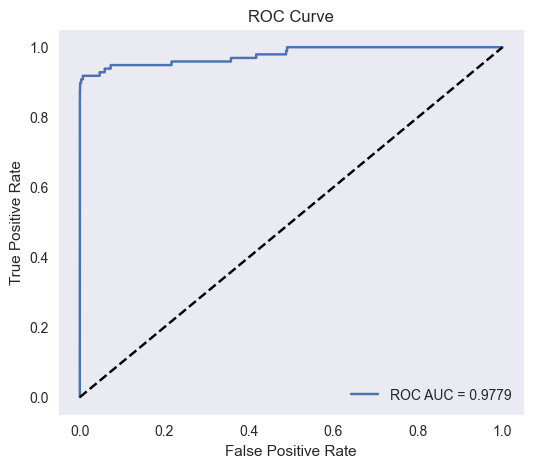

In [23]:


# predicted probabilities
y_probs = final_pipe.predict_proba(x_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

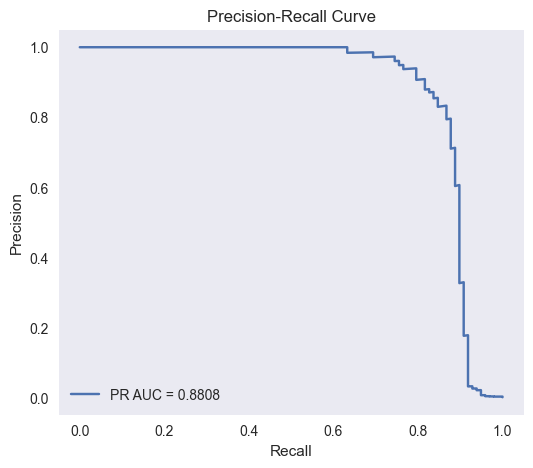

In [24]:


precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

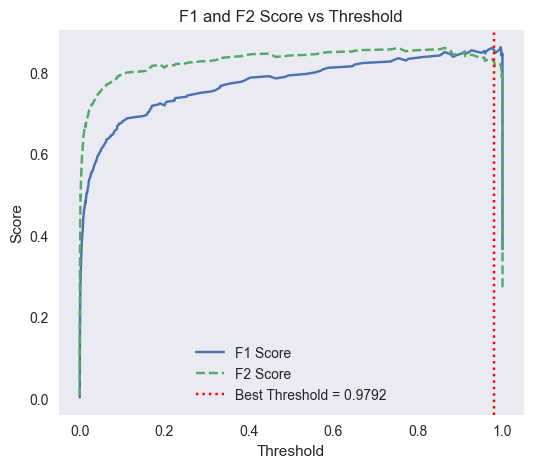

In [25]:


f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
f2_scores = 5 * (precisions * recalls) / (4 * precisions + recalls + 1e-8)

plt.figure(figsize=(6, 5))
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.plot(thresholds, f2_scores[:-1], label="F2 Score", linestyle='--')
plt.axvline(x=best_threshold, color='red', linestyle=':', label=f"Best Threshold = {best_threshold:.4f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1 and F2 Score vs Threshold")
plt.legend()
plt.grid()
plt.show()

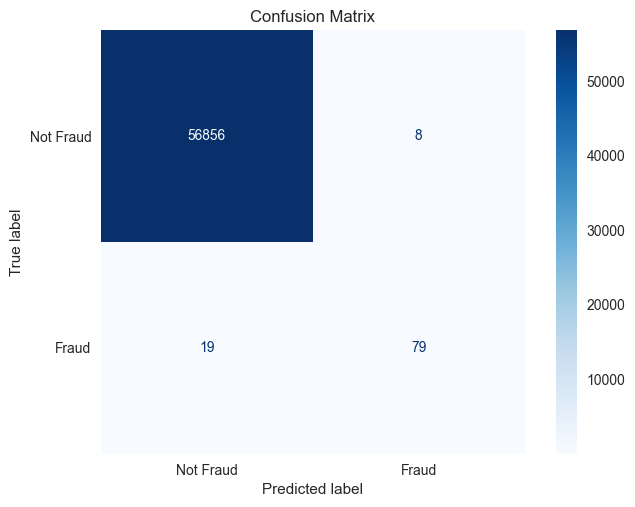

In [26]:


y_preds = (y_probs >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [27]:
joblib.dump(final_pipe,r'C:\first_data_science_proj\Credit_Card_Fraud_Detection\models\models_xgb_nb.pkl')
print('saved')

saved
